In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [0]:
df = pd.DataFrame({
    'x': [18, 27, 21, 15, 20, 29, 26, 48, 42, 60, 53, 58, 55, 51, 54, 
          64, 68, 65, 78, 25, 47, 37, 89, 84, 64, 73, 77, 59, 69, 40, 36,
          38, 17, 14, 34, 39, 94, 97, 64, 56, 78, 98, 39, 49, 47, 59, 48],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 
          19, 7, 24, 24, 20, 82, 41, 30, 58, 48, 60, 70, 94, 66, 91, 100,
          77, 63, 56, 28, 72, 94, 97, 48, 18, 23, 76, 32, 44, 74, 88]
})

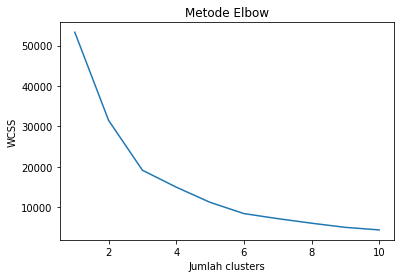

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

<function matplotlib.pyplot.show>

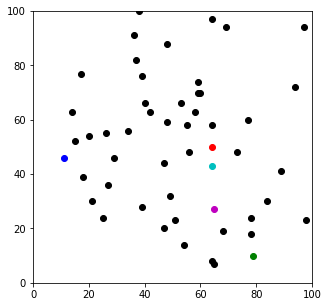

In [12]:
k = 5
centroids = {
    i+1 : [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = 'k')
colmap = {1: 'r' , 2: 'g' , 3: 'b', 4: 'c', 5: 'm'}
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show


    x   y  distance_from_1  ...  distance_from_5  closest  color
0  18  39        47.296934  ...        48.507731        3      b
1  27  36        39.560081  ...        39.051248        3      b
2  21  30        47.423623  ...        44.102154        3      b
3  15  52        49.040799  ...        55.901699        3      b
4  20  54        44.181444  ...        52.478567        3      b

[5 rows x 9 columns]


<function matplotlib.pyplot.show>

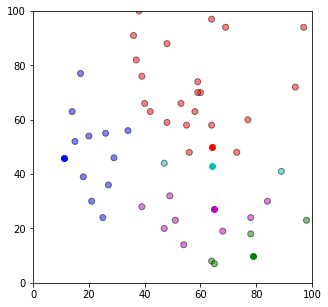

In [13]:
def assigment(df, centroids):
    for i in centroids.keys() :
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])

    return df

df = assigment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show

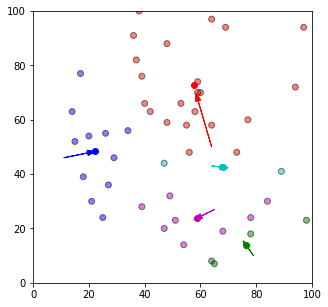

In [14]:
import copy

old_centroids = copy.deepcopy(centroids)
def update(k) :
    for i in centroids.keys() :
        centroids[i][0] = np.mean(df[df['closest'] == i ]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i ]['y'])
    
    return k

centroids = update(centroids)

fig = plt.figure(figsize = (5,5))

ax = plt.axes()
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)

for i in old_centroids.keys() :
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75

    ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc=colmap[i], ec = colmap[i])

plt.show()

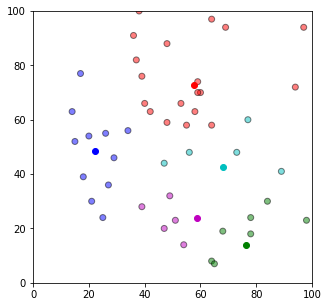

In [15]:
df = assigment(df,centroids)

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

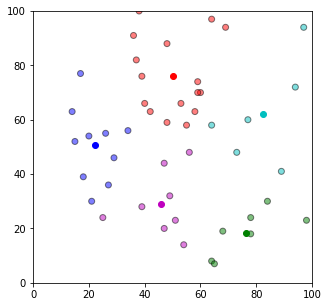

In [16]:
while True :
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assigment(df,centroids)

    if closest_centroids.equals(df['closest']) :
        break

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show()